In [2]:
import pandas as pd
import numpy as np 

import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 

import time 

from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import MultinomialNB 

from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from nltk.tokenize import RegexpTokenizer 
from nltk.stem.snowball import SnowballStemmer 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.pipeline import make_pipeline 

from PIL import Image 


from bs4 import BeautifulSoup 
from selenium import webdriver 
import networkx as nx 

import pickle

import warnings 
warnings.filterwarnings('ignore')

In [3]:
phishing_data1 = pd.read_csv('phishing_site_urls.csv')
phishing_data1.columns = ['URL','Label']

In [4]:
phishing_data1.head()


,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [5]:
frames = [phishing_data1]
phishing_urls = pd.concat(frames)

In [6]:
phishing_urls.to_csv(r'phishing_site_urls.csv', index = False)

In [7]:
phish_data = pd.read_csv('phishing_site_urls.csv')

In [8]:
phish_data.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [11]:
phish_data.tail()

,URL,Label
549341,23.227.196.215/,bad
549342,apple-checker.org/,bad
549343,apple-iclods.org/,bad
549344,apple-uptoday.org/,bad
549345,apple-search.info,bad


In [12]:
phish_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


In [13]:
phish_data.isnull().sum() 

URL      0
Label    0
dtype: int64

In [14]:
label_counts = pd.DataFrame(phish_data.Label.value_counts())

<AxesSubplot:ylabel='Label'>

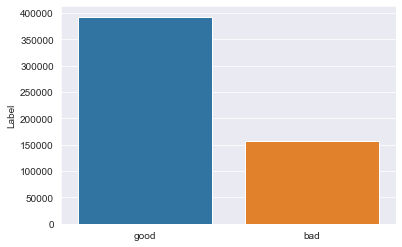

In [15]:
sns.set_style('darkgrid')
sns.barplot(label_counts.index,label_counts.Label)

In [16]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

In [17]:
phish_data.URL[0]

'nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=0.5.1&login_access=1322408526'

In [18]:
tokenizer.tokenize(phish_data.URL[0]) 

['nobell',
 'it',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'login',
 'SkyPe',
 'com',
 'en',
 'cgi',
 'bin',
 'verification',
 'login',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'index',
 'php',
 'cmd',
 'profile',
 'ach',
 'outdated',
 'page',
 'tmpl',
 'p',
 'gen',
 'failed',
 'to',
 'load',
 'nav',
 'login',
 'access']

In [19]:
print('Getting words tokenized ...')
t0= time.perf_counter()
phish_data['text_tokenized'] = phish_data.URL.map(lambda t: tokenizer.tokenize(t)) # doing with all rows
t1 = time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words tokenized ...
Time taken 2.5076688000000047 sec


In [20]:
phish_data.sample(5)

,URL,Label,text_tokenized
18743,www.cielopromocao.net/home/promocao.cielo/cada...,bad,"[www, cielopromocao, net, home, promocao, ciel..."
262436,wvls.lib.wi.us/ClarkCounty/clark/data/1/bbs16/...,good,"[wvls, lib, wi, us, ClarkCounty, clark, data, ..."
401015,myspace.com/video/vid/536195313,good,"[myspace, com, video, vid]"
119558,mac-camsarl.com/red.htm,bad,"[mac, camsarl, com, red, htm]"
464235,whosdatedwho.com/tpx_634553/little-dorrit/,good,"[whosdatedwho, com, tpx, little, dorrit]"


In [21]:
stemmer = SnowballStemmer("english") 

In [22]:
print('Getting words stemmed ...')
t0= time.perf_counter()
phish_data['text_stemmed'] = phish_data['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words stemmed ...
Time taken 33.528786800000006 sec


In [23]:
phish_data.sample(5)

,URL,Label,text_tokenized,text_stemmed
416567,presidency.ucsb.edu/ws/index.php?pid=15980,good,"[presidency, ucsb, edu, ws, index, php, pid]","[presid, ucsb, edu, ws, index, php, pid]"
153914,business.intuit.com/boorah-restaurants/MO/kans...,good,"[business, intuit, com, boorah, restaurants, M...","[busi, intuit, com, boorah, restaur, mo, kansa..."
25496,hsbc.xoom.it/portal/SecureLogin.php,bad,"[hsbc, xoom, it, portal, SecureLogin, php]","[hsbc, xoom, it, portal, securelogin, php]"
64903,www.shambhalasun.com/index.php?option=content&...,good,"[www, shambhalasun, com, index, php, option, c...","[www, shambhalasun, com, index, php, option, c..."
479958,zona-musical.com/postt211944.html,good,"[zona, musical, com, postt, html]","[zona, music, com, postt, html]"


In [24]:
print('Getting joiningwords ...')
t0= time.perf_counter()
phish_data['text_sent'] = phish_data['text_stemmed'].map(lambda l: ' '.join(l))
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting joiningwords ...
Time taken 0.19566229999998086 sec


In [25]:
phish_data.sample(5)

,URL,Label,text_tokenized,text_stemmed,text_sent
479754,zimbio.com/photos/William+Porterfield/Graeme+S...,good,"[zimbio, com, photos, William, Porterfield, Gr...","[zimbio, com, photo, william, porterfield, gra...",zimbio com photo william porterfield graem smith
508424,nikeifi.com/rss/feed/stream/,bad,"[nikeifi, com, rss, feed, stream]","[nikeifi, com, rss, feed, stream]",nikeifi com rss feed stream
303419,checkoutmycards.com/Players/Basketball/H,good,"[checkoutmycards, com, Players, Basketball, H]","[checkoutmycard, com, player, basketbal, h]",checkoutmycard com player basketbal h
300944,cdbaby.com/cd/inmulieribus,good,"[cdbaby, com, cd, inmulieribus]","[cdbabi, com, cd, inmulieribus]",cdbabi com cd inmulieribus
478232,youtube.com/watch?v=ugjDPbY77Zg,good,"[youtube, com, watch, v, ugjDPbY, Zg]","[youtub, com, watch, v, ugjdpbi, zg]",youtub com watch v ugjdpbi zg


In [26]:
#sliceing classes
bad_sites = phish_data[phish_data.Label == 'bad']
good_sites = phish_data[phish_data.Label == 'good']

In [27]:
bad_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...


In [28]:
good_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
18231,esxcc.com/js/index.htm?us.battle.net/noghn/en/...,good,"[esxcc, com, js, index, htm, us, battle, net, ...","[esxcc, com, js, index, htm, us, battl, net, n...",esxcc com js index htm us battl net noghn en r...
18232,wwweira¯&nvinip¿ncH¯wVö%ÆåyDaHðû/ÏyEùuË\nÓ6...,good,"[www, eira, nvinip, ncH, wV, yDaH, yE, u, rT, ...","[www, eira, nvinip, nch, wv, ydah, ye, u, rt, ...",www eira nvinip nch wv ydah ye u rt u g m i xz...
18233,'www.institutocgr.coo/web/media/syqvem/dk-óij...,good,"[www, institutocgr, coo, web, media, syqvem, d...","[www, institutocgr, coo, web, media, syqvem, d...",www institutocgr coo web media syqvem dk ij r ...
18234,Yìê koãÕ»Î§DéÎl½ñ¡ââqtò¸/à; Í,good,"[Y, ko, D, l, qt]","[y, ko, d, l, qt]",y ko d l qt
18236,ruta89fm.com/images/AS@Vies/1i75cf7b16vc<Fd16...,good,"[ruta, fm, com, images, AS, Vies, i, cf, b, vc...","[ruta, fm, com, imag, as, vie, i, cf, b, vc, f...",ruta fm com imag as vie i cf b vc f d b g sd v...


In [ ]:
list_urls = ['https://www.ezeephones.com/','https://www.ezeephones.com/about-us'] #here i take phishing sites 
links_with_text = []

In [ ]:
for url in list_urls:
    browser.get(url)
    soup = BeautifulSoup(browser.page_source,"html.parser")
    for line in soup.find_all('a'):
        href = line.get('href')
        links_with_text.append([url, href])

In [10]:
df = pd.DataFrame(links_with_text, columns=["from", "to"])

In [11]:
df.head()

,from,to
0,https://www.ezeephones.com/,None
1,https://www.ezeephones.com/,https://www.ezeephones.com/
2,https://www.ezeephones.com/,/cart
3,https://www.ezeephones.com/,/category/notch-phones
4,https://www.ezeephones.com/,/category/Deals - Of The Day


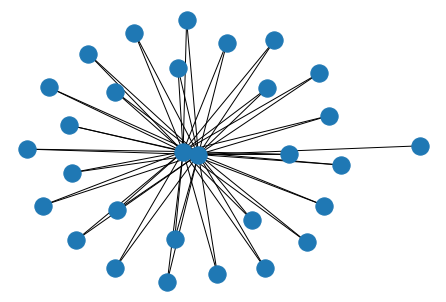

In [12]:
GA = nx.from_pandas_edgelist(df, source="from", target="to")
nx.draw(GA, with_labels=False)

In [30]:
#create cv object
cv = CountVectorizer()

In [31]:
#help(CountVectorizer())

In [32]:
feature = cv.fit_transform(phish_data.text_sent)

In [33]:
feature[:5].toarray() 

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [34]:
trainX, testX, trainY, testY = train_test_split(feature, phish_data.Label)

### LogisticRegression
* Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X.

In [35]:
# create lr object
lr = LogisticRegression()

In [36]:
lr.fit(trainX,trainY)

LogisticRegression()

In [37]:
lr.score(testX,testY)

0.9642485273451437

In [38]:
mnb = MultinomialNB()

In [39]:
mnb.fit(trainX,trainY)

MultinomialNB()

In [40]:
mnb.score(testX,testY)

0.9584380028688555

In [41]:
pipeline_ls = make_pipeline(CountVectorizer(tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize,stop_words='english'), LogisticRegression())
##(r'\b(?:http|ftp)s?://\S*\w|\w+|[^\w\s]+') ([a-zA-Z]+)([0-9]+) -- these tolenizers giving me low accuray 

In [42]:
trainX, testX, trainY, testY = train_test_split(phish_data.URL, phish_data.Label)

In [43]:
pipeline_ls.fit(trainX,trainY)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words='english',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)),
                ('logisticregression', LogisticRegression())])

In [44]:
pipeline_ls.score(testX,testY) 

0.9655373278868769

In [45]:
pickle.dump(pipeline_ls,open('phishing.pkl','wb'))

In [46]:
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
result = loaded_model.score(testX,testY)
print(result)

0.9655373278868769


In [47]:
predict_bad = ['yeniik.com.tr/wp-admin/js/login.alibaba.com/login.jsp.php','fazan-pacir.rs/temp/libraries/ipad','tubemoviez.exe','svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt']
predict_good = ['youtube.com/','youtube.com/watch?v=qI0TQJI3vdU','retailhellunderground.com/','restorevisioncenters.com/html/technology.html']
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
result = loaded_model.predict(predict_bad)
result2 = loaded_model.predict(predict_good)
print(result)
print("*"*30)
print(result2)

['bad' 'bad' 'bad' 'bad']
******************************
['good' 'good' 'good' 'good']


https://research.aalto.fi/en/datasets/phishstorm-phishing-legitimate-url-dataset